In [2]:
# python imports
import numpy as np
import pandas as pd
import rpy2

# R imports
%load_ext rpy2.ipython
%R require(ggplot2)

/usr/local/lib/python3.6/dist-packages/rpy2/rinterface/__init__.py:145: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)


array([1], dtype=int32)

In [9]:
mu, sigma = 0, 0.1
normal = np.random.normal(mu, sigma, 100000)
df = pd.DataFrame()
df['sample'] = normal

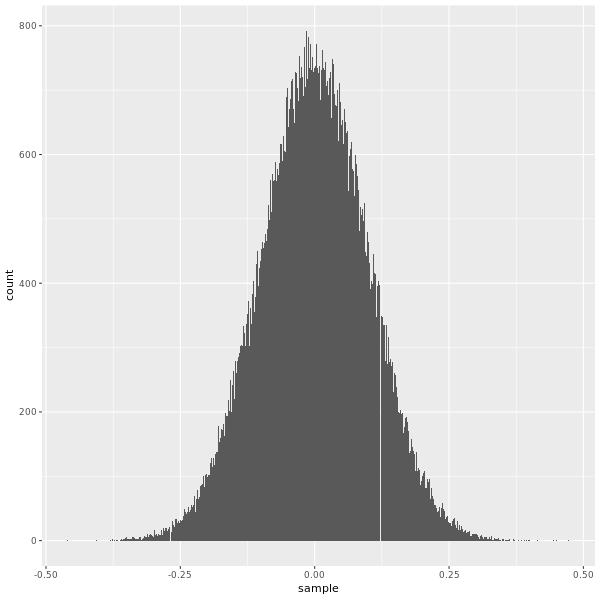

In [10]:
%%R -i df -w 600 -h 600
ggplot(data=df, aes(sample)) + geom_histogram(bins=500)